# Regression_2(TF).ipynb
Description   : Neural network for regression using tensorflow 2

## 1. 데이터 정규화(Normalization)
과적합 방지 기법 위한 회귀를 알아보자.<br>
보스턴 집 값 데이터를 keras 내부 함수를 통해 가져와서 계산한다.

In [10]:
# 데이터 셋 다운로드
from tensorflow.keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

전처리를 위한 데이터 정규화(Normalization)는 평균($\mu$)과 표준편차($\sigma$)를 활용한다.
$$z = {\frac{x - \mu}{\sigma}}$$ 

In [9]:
# 데이터 전처리(정규화)
x_mean = train_X.mean(axis = 0)
x_std = train_X.std(axis = 0)

train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis = 0)
y_std = train_Y.std(axis = 0)

train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.782152603377916


## 2. keras를 활용한 회귀 신경망 구축
이번에는 ReLU와 adam을 활용해보자.<br>
ReLU의 정의는 다음과 같다.
$$
f(x)=
\begin{cases}
0, & \mbox{if }x\mbox{ < 0} \\
x, & \mbox{if }x\mbox{ $\ge$ 0}
\end{cases}

In [3]:
import tensorflow as tf

# 회귀 신경망 모델 구축
model  = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 52, activation='relu', input_shape = (13,)), # unit 수도 연구자마다 다르다.
    tf.keras.layers.Dense(units = 39, activation='relu'),
    tf.keras.layers.Dense(units = 26, activation='relu'),
    tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07), loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 예측 모델 -> 학습횟수 25회, batch size 32로 설정 = 스텝마다 32개씩 반복, 학습 데이터 중 25%를 검증 데이터로 사용
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25, \
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')]) # 과정합 방지 기법

Epoch 1/25
10/10 [==============================] - 3s 241ms/step - loss: 3.7911 - val_loss: 1.2521
Epoch 2/25
10/10 [==============================] - 0s 16ms/step - loss: 0.5529 - val_loss: 0.8987
Epoch 3/25
10/10 [==============================] - 0s 19ms/step - loss: 0.4813 - val_loss: 0.4964
Epoch 4/25
10/10 [==============================] - 0s 14ms/step - loss: 0.2688 - val_loss: 0.3452
Epoch 5/25
10/10 [==============================] - 0s 12ms/step - loss: 0.2398 - val_loss: 0.3273
Epoch 6/25
10/10 [==============================] - 0s 13ms/step - loss: 0.2000 - val_loss: 0.1955
Epoch 7/25
10/10 [==============================] - 0s 17ms/step - loss: 0.1103 - val_loss: 0.1487
Epoch 8/25
10/10 [==============================] - 0s 15ms/step - loss: 0.1598 - val_loss: 0.2223
Epoch 9/25
10/10 [==============================] - 0s 17ms/step - loss: 0.1273 - val_loss: 0.1681
Epoch 10/25
10/10 [==============================] - 0s 19ms/step - loss: 0.1020 - val_loss: 0.1554


## 3. 시각화
주택 가격 데이터를 회귀를 통해 구한 예측 모델을 확인해보자.

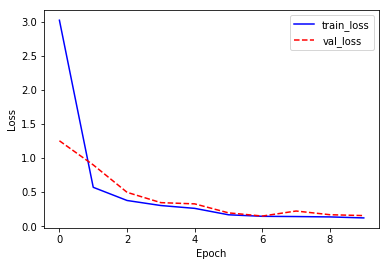

In [5]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label = 'train_loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.3929


0.3928758203983307

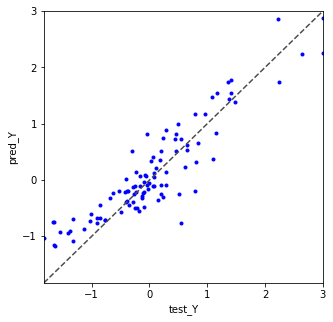

In [8]:
# 실제 주택 가격과 예측 주택 가격 시각화
pred_Y = model.predict(test_X)

plt.figure(figsize = (5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls='--', c='.3')
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()